In [42]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns

df = pd.read_csv('Dry_Bean_Datasetcsv.csv')
pd.set_option('display.max_rows', None)
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [23]:
#seker, barbunya, bombay, cali, horoz, sira, dermason
label = df['Class']
df['Class'] = label.map({'DERMASON':5,'SIRA':0, 'SEKER': 3, 'HOROZ':2 , 'CALI':4 , 'BARBUNYA': 6 , 'BOMBAY': 1})
label.value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

In [43]:
df1 = df[df['Class']=='SIRA'].head(500)
df2 = df[df['Class']=='BOMBAY'].head(500)
df3 = df[df['Class']=='HOROZ'].head(500)
df4 = df[df['Class']=='SEKER'].head(500)
df5 = df[df['Class']=='CALI'].head(500)
df6 = df[df['Class']=='DERMASON'].head(500)
df7 = df[df['Class']=='BARBUNYA'].head(500)
df_list = [df1, df2, df3, df4, df5, df6, df7]
df_all = pd.concat(df_list, ignore_index=True)

In [44]:
df_list = [df1, df2, df3, df4, df5, df6, df7]
df_all = pd.concat(df_list, ignore_index=True)

In [41]:
df_all

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class


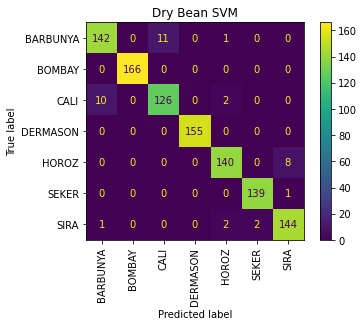

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn import svm
import numpy as np
from sklearn.metrics import plot_confusion_matrix, classification_report
import matplotlib.pyplot as plt

y = df_all[['Class']]
X = df_all.drop("Class",axis=1)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)

svmClf = svm.SVC(kernel='linear',gamma='auto', C=1, random_state = 0)
svmClf.fit(x_train,np.ravel(y_train))

# Displaying Results in Confusion Matrix
plot_confusion_matrix(svmClf, x_test, y_test)  
plt.xticks(rotation=90)
plt.grid(False)
plt.title('Dry Bean SVM')
plt.show()  

In [46]:
predictedSVM = svmClf.predict(x_test)
reportSVM = classification_report(y_test, predictedSVM, output_dict=True)
reportdfSVM = pd.DataFrame(reportSVM).transpose()
reportdfSVM

,precision,recall,f1-score,support
BARBUNYA,0.936842,0.908163,0.922280,98.000000
BOMBAY,1.000000,1.000000,1.000000,112.000000
CALI,0.903226,0.933333,0.918033,90.000000
DERMASON,1.000000,1.000000,1.000000,117.000000
HOROZ,0.967033,0.956522,0.961749,92.000000
SEKER,0.977528,0.988636,0.983051,88.000000
SIRA,0.951456,0.951456,0.951456,103.000000
accuracy,0.964286,0.964286,0.964286,0.964286
macro avg,0.962298,0.962587,0.962367,700.000000
weighted avg,0.964415,0.964286,0.964280,700.000000
